In [14]:
import pandas as pd
df = pd.read_csv("IMDB Dataset.csv")
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [4]:
from sklearn.model_selection import train_test_split

In [7]:
df.replace("positive", 1, inplace=True)
df.sentiment.replace("negative", 0, inplace=True)
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [8]:
df = df.drop_duplicates('review')

In [9]:
df.shape

(49582, 2)

<AxesSubplot: xlabel='sentiment', ylabel='count'>

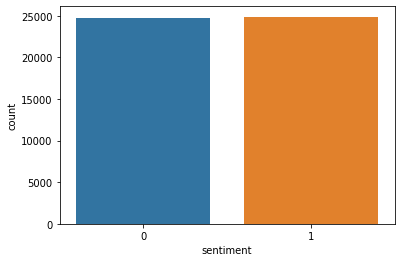

In [11]:
import seaborn as sns
sns.countplot(data=df, x='sentiment')

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
X = df['review']
Y = df['sentiment']
vect = TfidfVectorizer()
X = vect.fit_transform(df['review'])
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [13]:
x_train = x_train[:2000]
y_train = y_train[:2000]
x_test = x_test[:500]
y_test = y_test[:500]

C:\Users\Sahil\AppData\Local\Temp\ipykernel_20016\1351179734.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_train = y_train[:2000]
C:\Users\Sahil\AppData\Local\Temp\ipykernel_20016\1351179734.py:4: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_test = y_test[:500]


In [10]:
x_train = x_train.toarray()
x_test = x_test.toarray()

In [11]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [12]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(units=16, activation='relu', ))
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=10, epochs=15)

Epoch 1/15
200/200 [==============================] - 7s 25ms/step - loss: 0.6645 - accuracy: 0.5855
Epoch 2/15
200/200 [==============================] - 4s 19ms/step - loss: 0.5224 - accuracy: 0.8270
Epoch 3/15
200/200 [==============================] - 5s 24ms/step - loss: 0.3129 - accuracy: 0.9480
Epoch 4/15
200/200 [==============================] - 3s 16ms/step - loss: 0.1557 - accuracy: 0.9750
Epoch 5/15
200/200 [==============================] - 4s 22ms/step - loss: 0.0805 - accuracy: 0.9835
Epoch 6/15
200/200 [==============================] - 5s 24ms/step - loss: 0.0450 - accuracy: 0.9905
Epoch 7/15
200/200 [==============================] - 4s 18ms/step - loss: 0.0267 - accuracy: 0.9940
Epoch 8/15
200/200 [==============================] - 6s 32ms/step - loss: 0.0185 - accuracy: 0.9955
Epoch 9/15
200/200 [==============================] - 7s 33ms/step - loss: 0.0127 - accuracy: 0.9970
Epoch 10/15
200/200 [==============================] - 4s 20ms/step - loss: 0.0094 - accura

In [13]:
acc = model.evaluate(x_test, y_test)
print('accuracy:', acc)

16/16 [==============================] - 1s 21ms/step - loss: 0.6402 - accuracy: 0.8360
accuracy: [0.6401616930961609, 0.8360000252723694]
